SIMPLE LINEAR REGRESSION
'''1) Delivery_time -> Predict delivery time using sorting time 
   2) Salary_hike -> Build a prediction model for Salary_hike
Build a simple linear regression model by performing EDA and do necessary transformations and select the best model 
using R or Python.'''

In [1]:
#Part 1- Delivery time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_del = pd.read_csv('delivery_time.csv')
data_del.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [3]:
#identifiying missing data, describing data
data_del.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [4]:
#duplicated rows
data_del[data_del.duplicated()].shape

(0, 2)

<AxesSubplot:>

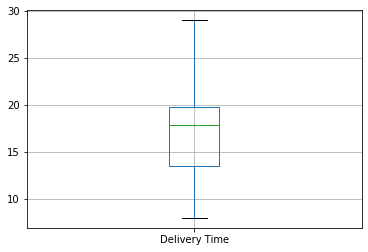

In [5]:
#Identifying outliers
data_del.boxplot(column='Delivery Time')

<AxesSubplot:>

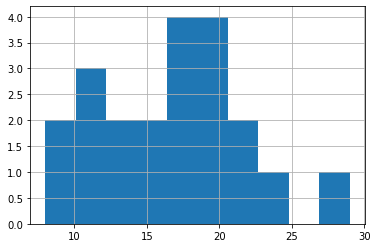

In [6]:
data_del['Delivery Time'].hist()

In [7]:
data_del['Delivery Time'].describe()

count    21.000000
mean     16.790952
std       5.074901
min       8.000000
25%      13.500000
50%      17.830000
75%      19.750000
max      29.000000
Name: Delivery Time, dtype: float64

<AxesSubplot:>

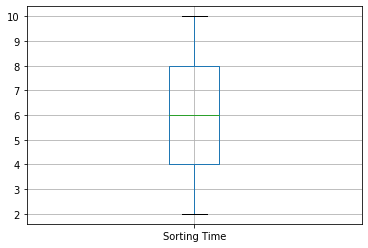

In [8]:
data_del.boxplot(column='Sorting Time')

(array([1., 3., 3., 1., 0., 3., 4., 1., 2., 3.]),
 array([ 2. ,  2.8,  3.6,  4.4,  5.2,  6. ,  6.8,  7.6,  8.4,  9.2, 10. ]),
 <BarContainer object of 10 artists>)

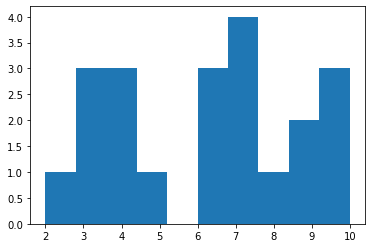

In [9]:

plt.hist(data_del['Sorting Time'])

Correlation

In [10]:
data_del.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


<AxesSubplot:title={'center':'Scatterplot'}, xlabel='Sorting Time', ylabel='Delivery Time'>

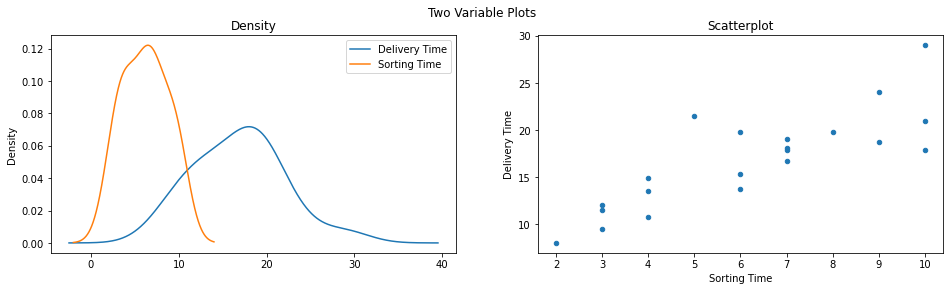

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))
fig.suptitle('Two Variable Plots')
data_del.plot.density(ax=ax1, title='Density')
data_del.plot.scatter(x='Sorting Time', y='Delivery Time',ax=ax2, title='Scatterplot')

# Simple Linear Regression Model

<AxesSubplot:xlabel='Sorting_Time', ylabel='Delivery_Time'>

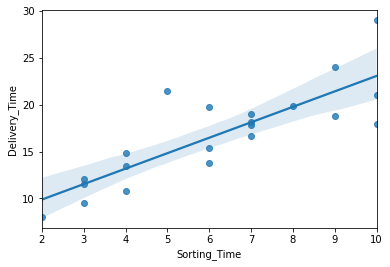

In [12]:
import statsmodels.formula.api as smf
import seaborn as sns

#rename the column
data_del1 = data_del.rename({'Delivery Time': 'Delivery_Time'}, axis=1)
data_del1 = data_del1.rename({'Sorting Time': 'Sorting_Time'}, axis=1)

model_delTime = smf.ols("Delivery_Time~Sorting_Time", data = data_del1).fit()
sns.regplot(x="Sorting_Time", y="Delivery_Time", data = data_del1)

In [13]:
#Coefficients(B0 & B1)
model_delTime.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [14]:
print('t-Values and p-Values : \n',model_delTime.tvalues, '\n', model_delTime.pvalues)

t-Values and p-Values : 
 Intercept       3.823349
Sorting_Time    6.387447
dtype: float64 
 Intercept       0.001147
Sorting_Time    0.000004
dtype: float64


In [15]:
#R squared values
(model_delTime.rsquared, model_delTime.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [16]:
model_influence = model_delTime.get_influence()
(c, _) = model_influence.cooks_distance

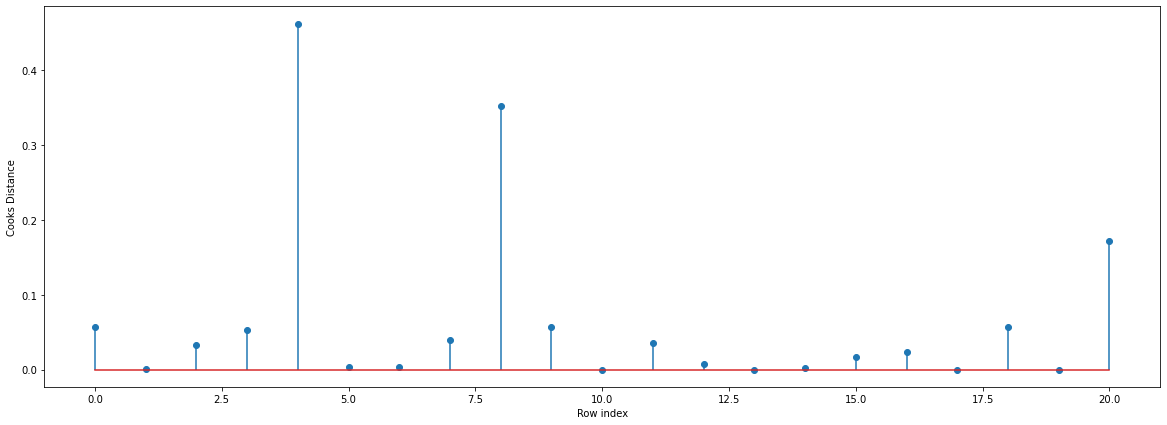

In [17]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data_del1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

'''As, p value for Sorting_Time is 0.000004 and less than 0.05, so, inddependent var. is significant,
   No influencers is found to improve the regression model and
   R^2 value is 0.682 is good to predict the Delivery Time from Sorting Time '''

# Predict for new data point (Delivery Time)

In [47]:
#Predict Delivery Time for 15 and 18 Sorting Time
newdata = pd.Series([15,18])

In [48]:
data_predict = pd.DataFrame(newdata, columns=['Sorting_Time'])

In [59]:
data_res = pd.concat([data_predict,  pd.DataFrame(model_delTime.predict(data_predict), columns=['Delivery_Time'])], axis=1)

data_res

,Sorting_Time,Delivery_Time
0,15,31.318032
1,18,36.265092
